In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# PROBLEM STMT 1:PREDICTING CAPACITY IN mw

In [126]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [127]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [129]:
df.sample(15)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
559,IND,India,OBRA-A,IND0000311,1094.000,24.4448,82.9803,Coal,Oil,NaN,...,2019.0,NaN,3182.74200,3505.6110,3359.81400,3866.70700,3319.054000,NaN,Central Electricity Authority,NaN
30,IND,India,Anikkadavu Wind Farm,WRI1026347,19.800,10.7245,77.1893,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,IND,India,F_BAD CCGT,IND0000115,431.586,28.3452,77.3615,Gas,NaN,NaN,...,2019.0,NaN,1527.00000,1068.0000,1004.90800,811.00000,578.000000,NaN,Central Electricity Authority,NaN
547,IND,India,N_SAGAR LBC,IND0000284,60.000,16.5697,79.3389,Hydro,NaN,NaN,...,2019.0,NaN,41.85965,0.0000,0.00000,12.73600,53.033500,NaN,Central Electricity Authority,NaN
168,IND,India,DGEN MEGA CCCP,IND0000093,1200.000,21.6923,72.6215,Gas,NaN,NaN,...,2019.0,NaN,0.00000,2636.8640,2.97000,0.00000,0.000000,NaN,Central Electricity Authority,NaN
16,IND,India,ANTA GT,IND0000014,419.330,25.1797,76.3188,Gas,NaN,NaN,...,2019.0,NaN,1611.98700,909.0000,666.42000,430.00000,528.280000,NaN,Central Electricity Authority,NaN
827,IND,India,Talcher Kaniha Solar Power Plant,WRI1026215,10.000,21.0866,85.0987,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,IND,India,SUBERNREKHA I&II,IND0000427,130.000,23.4570,85.5550,Hydro,NaN,NaN,...,2019.0,NaN,33.56135,50.9838,29.97935,189.42810,100.684050,NaN,Central Electricity Authority,NaN
567,IND,India,PALATANA CCPP,IND0000317,726.600,23.4987,91.4385,Gas,NaN,NaN,...,2019.0,NaN,2391.79600,3337.2930,3993.95800,3870.43000,4515.954800,NaN,Central Electricity Authority,NaN
577,IND,India,PARE,IND0000540,110.000,27.2387,93.8107,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,345.409673,NaN,Central Electricity Authority,NaN


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Froma bove info we observe that there are 907 entries and 27 columns

other_fuel2,other_fuel3,generation_gwh_2013   ,generation_gwh_2019,estimated_generation_gwh  ,wepp_id have all null values,so lets drop these columns as thay dont have any data inside them

In [131]:
df.drop(['other_fuel2','other_fuel3','generation_gwh_2013' ,'generation_gwh_2019','estimated_generation_gwh' ,'wepp_id'],axis=1,inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

In [133]:
df.other_fuel1.value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [134]:
df.owner.value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

From above feature we notice owners are unique for each powerplant which is not much useful for prediction of primary fuel.
Lets drop this column as it have only 280 column data which are not null out of 907

In [135]:
df.country.value_counts()

IND    907
Name: country, dtype: int64

As we notice that India is the only country unique to the dataset,Lets drop this column as it is not much helpful for predicting the fuel type

In [136]:
df.drop('country',axis=1,inplace=True)

In [137]:
df.country_long.value_counts()

India    907
Name: country_long, dtype: int64

As we observe that country _long is the full form given to country,as only 1 country is there which is unique to whole dataset ,lets drop this column

In [138]:
df.drop('country_long',axis=1,inplace=True)

In [139]:
df.name.value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

Also,the name is feature which holds name/title of the powerplant has each unique values ,so lets drop this column holding unique values

In [140]:
df.drop('name',axis=1,inplace=True)

In [141]:
df.shape

(907, 18)

In [142]:
df.source.value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

As we observe that source is entity/organisation reprting the data,which is not helpful for prediction of target variable 

Hence,drooping this column

In [143]:
df.url.value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

As we observe that url holds the information about power plant ,which is not helpful for prediction of target variable 

Hence,droping this column

In [144]:
df.drop('url',axis=1,inplace=True)

In [145]:
df.shape

(907, 17)

In [146]:
df.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gppd_idnr               907 non-null    object 
 1   capacity_mw             907 non-null    float64
 2   latitude                861 non-null    float64
 3   longitude               861 non-null    float64
 4   primary_fuel            907 non-null    object 
 5   other_fuel1             198 non-null    object 
 6   commissioning_year      527 non-null    float64
 7   owner                   342 non-null    object 
 8   source                  907 non-null    object 
 9   geolocation_source      888 non-null    object 
 10  year_of_capacity_data   519 non-null    float64
 11  generation_gwh_2014     398 non-null    float64
 12  generation_gwh_2015     422 non-null    float64
 13  generation_gwh_2016     434 non-null    float64
 14  generation_gwh_2017     440 non-null    fl

In [148]:
df.gppd_idnr.value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

As idnr columns holds unique string ids of the power plant ,not much useful for prediction of capacity
Hence dropping thsi column

In [149]:
df.drop('gppd_idnr',axis=1,inplace=True)

In [150]:
df.year_of_capacity_data .value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

As we observe that it has only 1 year data which is common for 519 rows,hence not much useful for predicting the target

Hence,dropping this column

In [151]:
df.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [152]:
df.dropna(subset=['geolocation_source','latitude','longitude'],inplace=True) 

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             861 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            861 non-null    object 
 4   other_fuel1             193 non-null    object 
 5   commissioning_year      496 non-null    float64
 6   owner                   328 non-null    object 
 7   source                  861 non-null    object 
 8   geolocation_source      861 non-null    object 
 9   year_of_capacity_data   492 non-null    float64
 10  generation_gwh_2014     392 non-null    float64
 11  generation_gwh_2015     414 non-null    float64
 12  generation_gwh_2016     424 non-null    float64
 13  generation_gwh_2017     428 non-null    float64
 14  generation_gwh_2018     436 non-null    fl

In [154]:
df.commissioning_year.value_counts()

2015.0    25
2013.0    23
2012.0    22
2010.0    18
2016.0    17
          ..
1954.0     1
1969.0     1
1939.0     1
1927.0     1
1953.0     1
Name: commissioning_year, Length: 71, dtype: int64

In [155]:
df.commissioning_year.unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 2000., 1989., 2017., 1977., 1980., 2003., 1984.,
       1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988., 1973.,
       2012., 1968., 1964., 2016., 2013., 1962., 1987., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1952., 1990., 1982., 1956.,
       1946., 1958., 1943., 1954., 1969., 1939., 1927., 1974., 1953.])

In [156]:
df.drop('other_fuel1',axis=1,inplace=True)    #As this columns only hold 200 values ou of 888 records

In [157]:
df.shape

(861, 15)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             861 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            861 non-null    object 
 4   commissioning_year      496 non-null    float64
 5   owner                   328 non-null    object 
 6   source                  861 non-null    object 
 7   geolocation_source      861 non-null    object 
 8   year_of_capacity_data   492 non-null    float64
 9   generation_gwh_2014     392 non-null    float64
 10  generation_gwh_2015     414 non-null    float64
 11  generation_gwh_2016     424 non-null    float64
 12  generation_gwh_2017     428 non-null    float64
 13  generation_gwh_2018     436 non-null    float64
 14  generation_data_source  437 non-null    ob

In [159]:
#Checking for null values
df.isnull().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        365
owner                     533
source                      0
geolocation_source          0
year_of_capacity_data     369
generation_gwh_2014       469
generation_gwh_2015       447
generation_gwh_2016       437
generation_gwh_2017       433
generation_gwh_2018       425
generation_data_source    424
dtype: int64

In [160]:
df.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [161]:
#Handling null values

In [162]:
df.fillna(df.mean(),inplace=True)

In [163]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['owner'] = imputer.fit_transform(df[['owner']])

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             861 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            861 non-null    object 
 4   commissioning_year      861 non-null    float64
 5   owner                   861 non-null    object 
 6   source                  861 non-null    object 
 7   geolocation_source      861 non-null    object 
 8   year_of_capacity_data   861 non-null    float64
 9   generation_gwh_2014     861 non-null    float64
 10  generation_gwh_2015     861 non-null    float64
 11  generation_gwh_2016     861 non-null    float64
 12  generation_gwh_2017     861 non-null    float64
 13  generation_gwh_2018     861 non-null    float64
 14  generation_data_source  437 non-null    ob

In [165]:
df.generation_data_source.value_counts()

Central Electricity Authority    437
Name: generation_data_source, dtype: int64

As from above we notice that generation source is common for all datasets,also if we fill null values also it will replace with central Authority ie unique value
So,lets drop this column as not further helpful for analysis

In [166]:
df.drop('generation_data_source',axis=1,inplace=True)

As we have handled null values successfully and dropped the columns not much helpful for analysis.

Further moving for EDA

In [167]:
df.year_of_capacity_data.value_counts()

2019.0    861
Name: year_of_capacity_data, dtype: int64

EDA--UNIVARIATE ANALYSIS

Coal       253
Hydro      233
Solar      123
Wind       108
Gas         68
Biomass     50
Oil         17
Nuclear      9
Name: primary_fuel, dtype: int64

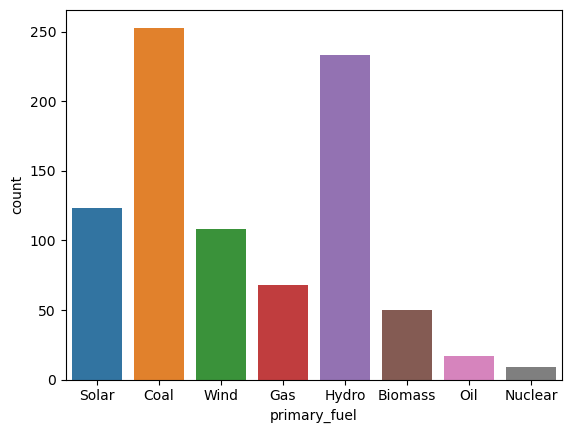

In [168]:
sns.countplot(data=df,x='primary_fuel')
df.primary_fuel.value_counts()

From above we notice that Coal fuel is primary and most used for the powerplants

Majorly oil is used as secondary fuel

<Axes: ylabel='Frequency'>

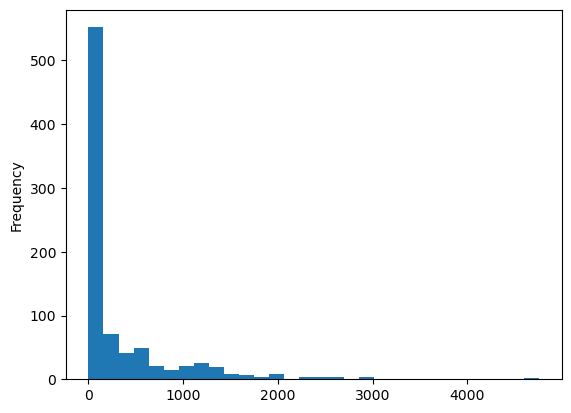

In [169]:
df['capacity_mw'].plot.hist(bins=30)

In [170]:
df.capacity_mw.nunique()

353

From above we notice that data is skewed towards right
Also,capacity of generation is majorly between 0 to 0.5

<Axes: xlabel='latitude', ylabel='Count'>

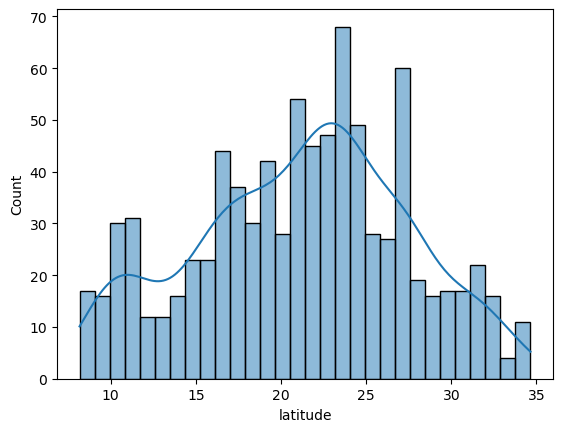

In [171]:
sns.histplot(x='latitude',data=df,bins=30,kde=True)


We observe that latitude has high frequency between 22 to 25.    
Also data is symmetrical

<Axes: xlabel='longitude', ylabel='Count'>

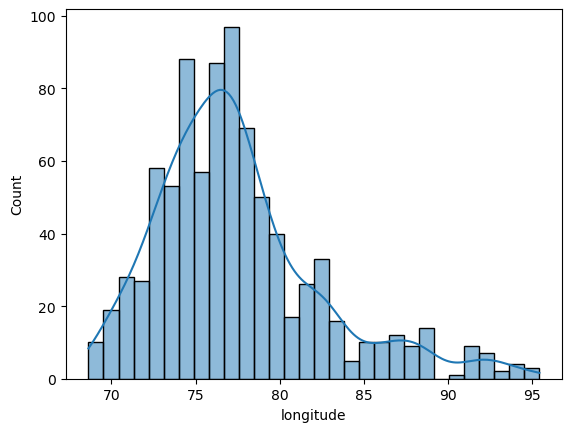

In [172]:
sns.histplot(x='longitude',data=df,bins=30,kde=True)


We observe that longitude has frequency between 75 to 78.  
Also data is very less skewed towards right


In [173]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<Axes: xlabel='generation_gwh_2014', ylabel='Count'>

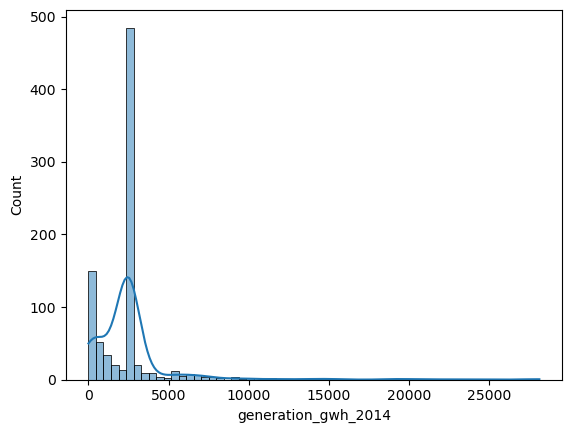

In [174]:
sns.histplot(x='generation_gwh_2014',data=df,bins=60,kde=True)


From above we notice that frequency count of 2500 is the greatest in year 2014.  
Also data is skewed towards right

<Axes: xlabel='generation_gwh_2015', ylabel='Count'>

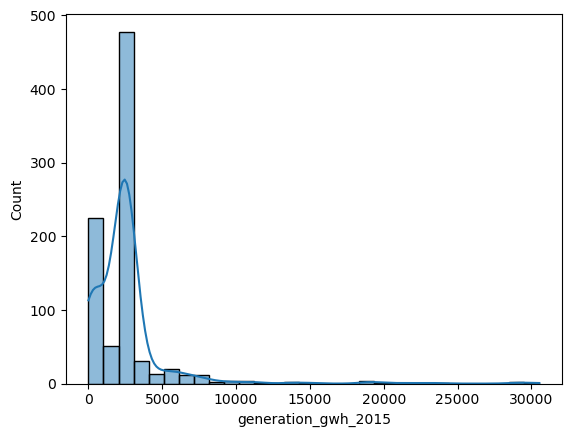

In [175]:
sns.histplot(x='generation_gwh_2015',data=df,bins=30,kde=True)

From above we notice that frequency count is highest between 0 to 2500 gwh.   
also,data is right skewed

<Axes: xlabel='generation_gwh_2016', ylabel='Count'>

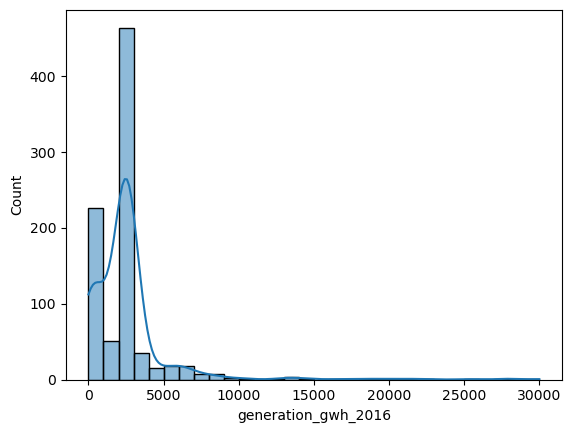

In [176]:
sns.histplot(x='generation_gwh_2016',data=df,bins=30,kde=True)

From above we notice that frequency count is highest between 0 to 2500 gwh.   
Also,data is right skewed

<Axes: xlabel='generation_gwh_2017', ylabel='Count'>

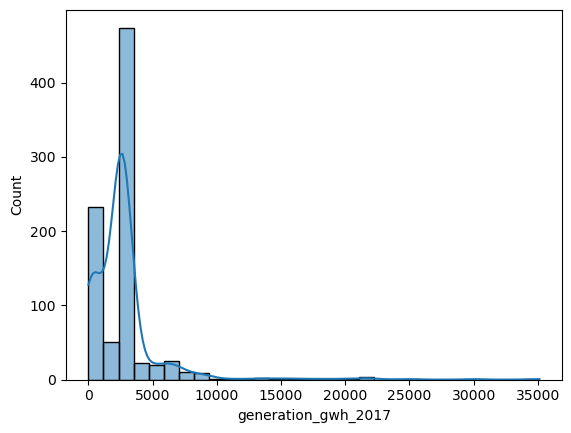

In [177]:
sns.histplot(x='generation_gwh_2017',data=df,bins=30,kde=True)

From above we notice that frequency count is highest between 0 to 2500 gwh.   
Also,data is right skewed

<Axes: xlabel='generation_gwh_2018', ylabel='Count'>

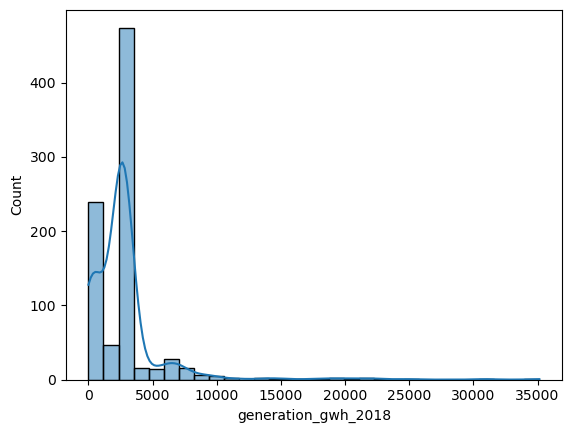

In [178]:
sns.histplot(x='generation_gwh_2018',data=df,bins=30,kde=True)

From above we notice that frequency count is highest between 0 to 2500 gwh.   
Also,data is right skewed

BIVARIATE ANALYSIS

<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

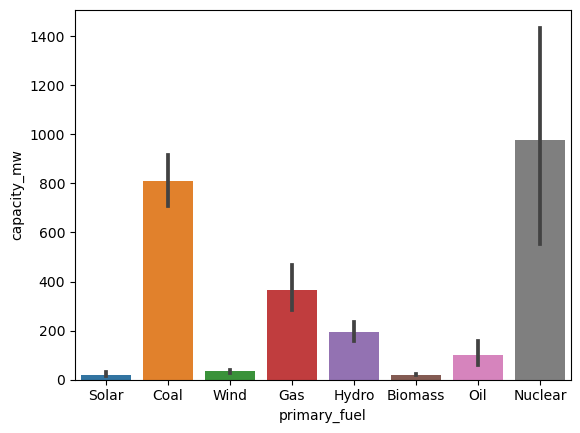

In [179]:
sns.barplot(x='primary_fuel',y='capacity_mw',data=df)

From above graph we notice that Nuclear used as primary fuel produces high capacity of power,while coal produces 2nd large electricity

We notice that Gas used as other fuel produces high capacity electric generation

<Axes: xlabel='generation_gwh_2014', ylabel='capacity_mw'>

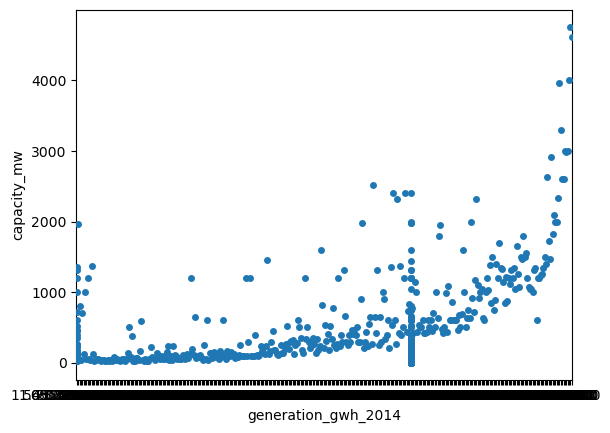

In [180]:
sns.stripplot(x='generation_gwh_2014',y='capacity_mw',data=df)

We observe that as generation increases the capacity of producing electricity also increses
They are positively linearly correlated to each other

<Axes: xlabel='generation_gwh_2015', ylabel='capacity_mw'>

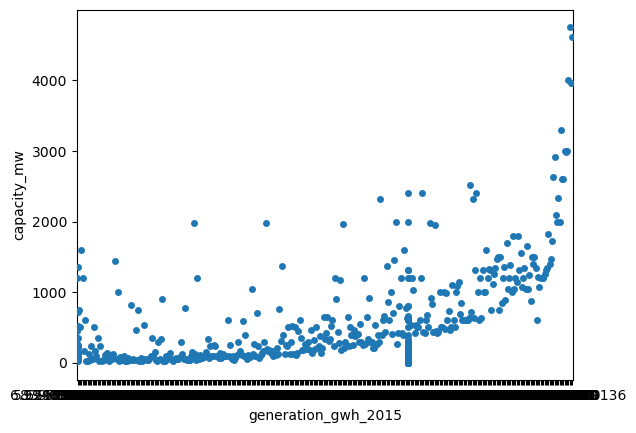

In [181]:
sns.stripplot(x='generation_gwh_2015',y='capacity_mw',data=df)

We observe that as generation increases the capacity of producing electricity also increses
They are positively linearly correlated to each other

<Axes: xlabel='generation_gwh_2016', ylabel='capacity_mw'>

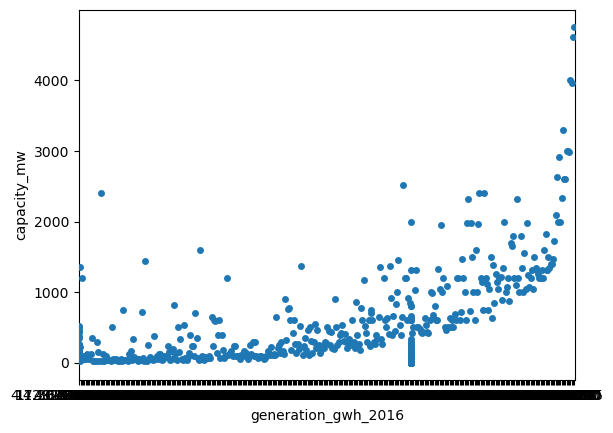

In [182]:
sns.stripplot(x='generation_gwh_2016',y='capacity_mw',data=df)

We observe that as generation increases the capacity of producing electricity also increses
They are positively linearly correlated to each other

<Axes: xlabel='generation_gwh_2017', ylabel='capacity_mw'>

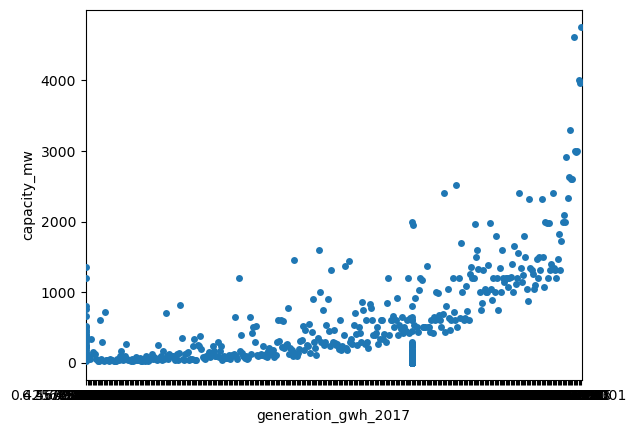

In [183]:
sns.stripplot(x='generation_gwh_2017',y='capacity_mw',data=df)

We observe that as generation increases the capacity of producing electricity also increses
They are positively linearly correlated to each other

<Axes: xlabel='generation_gwh_2018', ylabel='capacity_mw'>

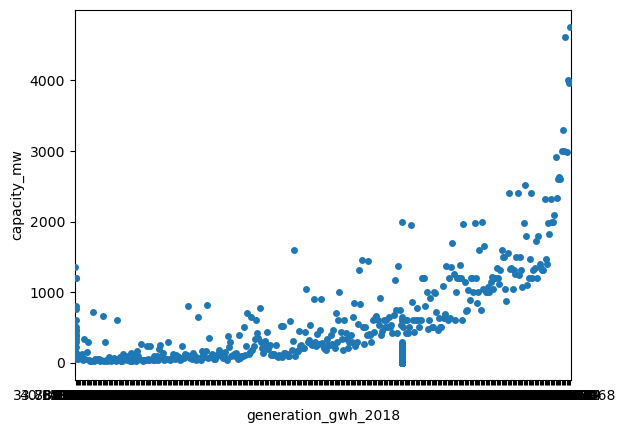

In [184]:
sns.stripplot(x='generation_gwh_2018',y='capacity_mw',data=df)

We observe that as generation increases the capacity of producing electricity also increses
They are positively linearly correlated to each other

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

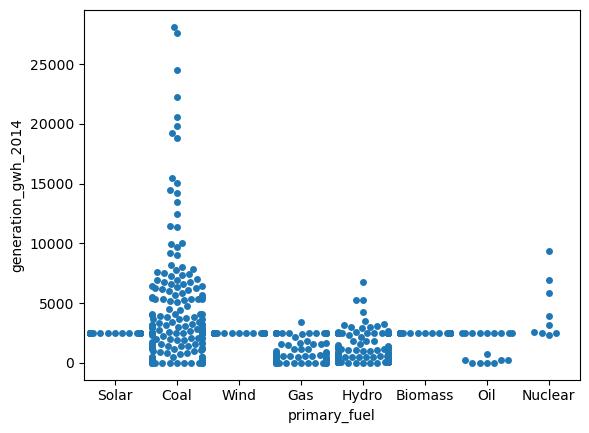

In [185]:
sns.swarmplot(x='primary_fuel',y='generation_gwh_2014',data=df)

We observe that Coal produces highest generation of electricty generation inyear 2014

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2015'>

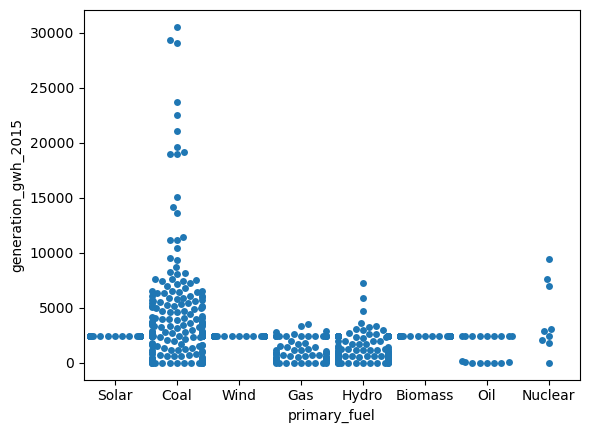

In [186]:
sns.swarmplot(x='primary_fuel',y='generation_gwh_2015',data=df)

We observe that coal producing highest generation of electricity in year 2015

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2016'>

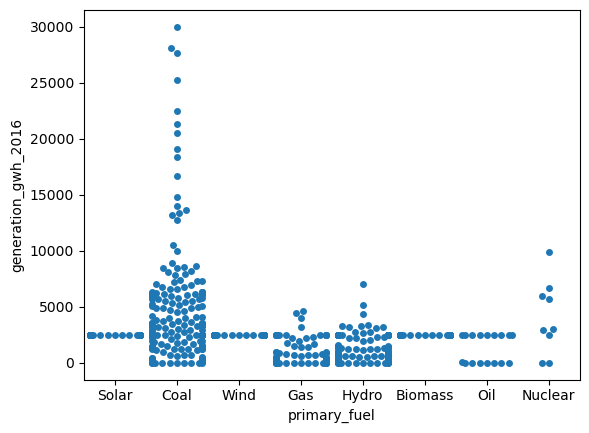

In [187]:
sns.swarmplot(x='primary_fuel',y='generation_gwh_2016',data=df)

We observe that coal producing highest generation of electricity in year 2016

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

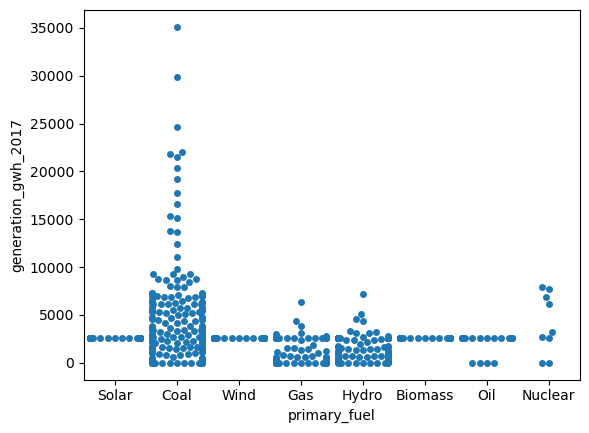

In [188]:
sns.swarmplot(x='primary_fuel',y='generation_gwh_2017',data=df)

We observe that coal producing highest generation of electricity in year 2017


<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2018'>

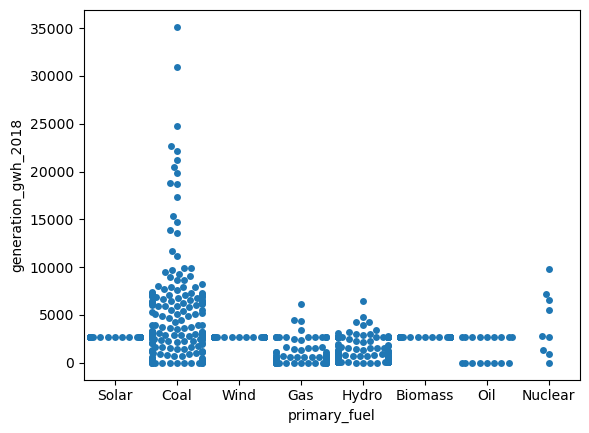

In [189]:
sns.swarmplot(x='primary_fuel',y='generation_gwh_2018',data=df)

We observe that coal producing highest generation of electricity in year 2018

<Axes: xlabel='latitude', ylabel='capacity_mw'>

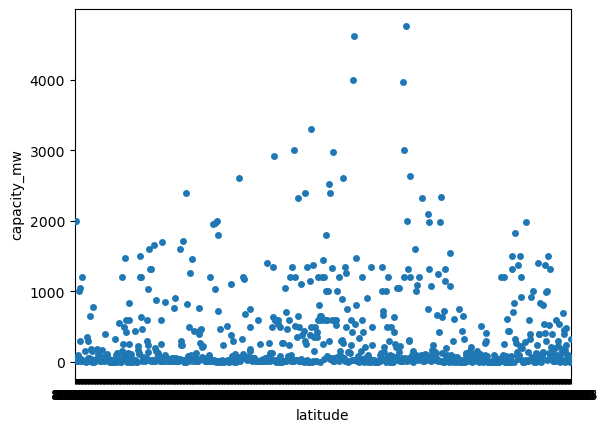

In [190]:
sns.swarmplot(x='latitude',y='capacity_mw',data=df)

From above graph,we analyse that latitude doesnt have much correlation with capacity of electricity generation

<Axes: xlabel='longitude', ylabel='capacity_mw'>

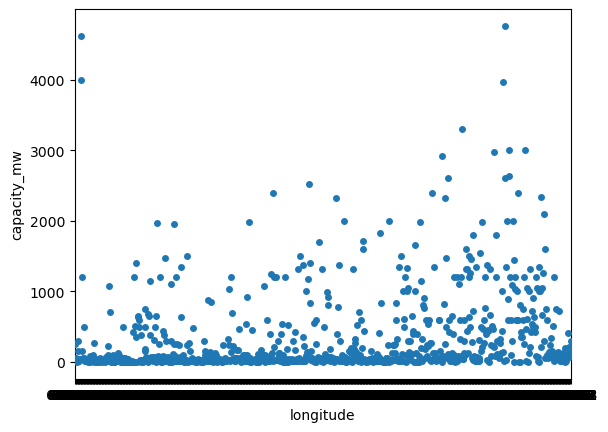

In [191]:
sns.swarmplot(x='longitude',y='capacity_mw',data=df)

From above graph,we analyse that latitude doesnt have much correlation with capacity of electricity generation

CHECKING OUTLIERS

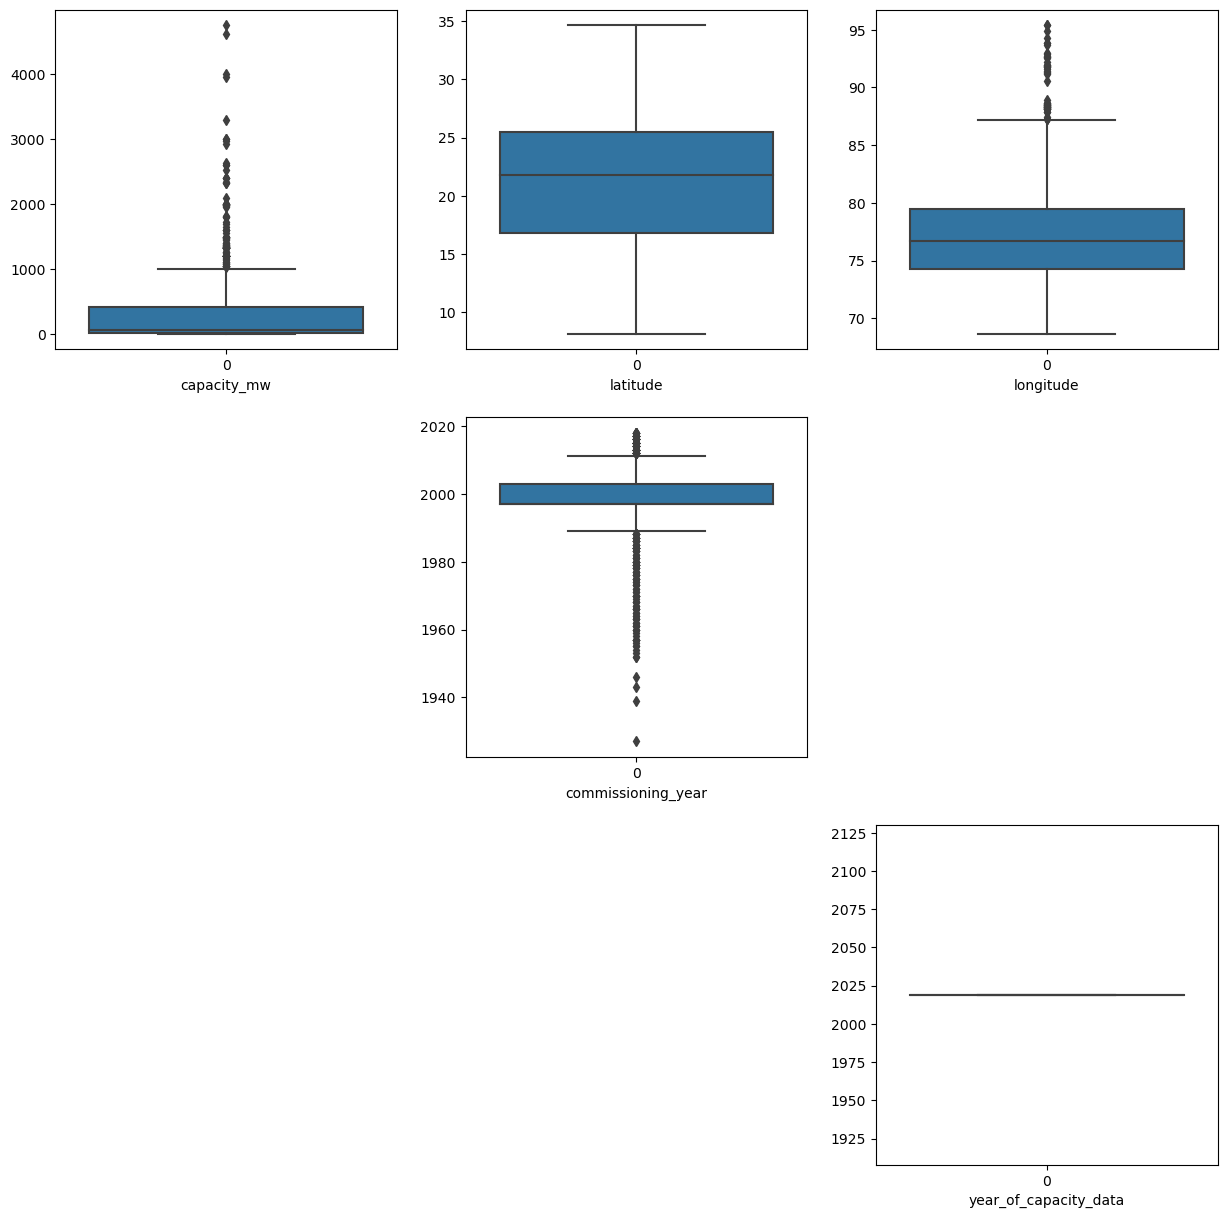

In [192]:
plt.figure(figsize=(15,15))
p=1
for i in df:
    if df[i].dtypes!="object":
        if p<=9:
            plt.subplot(3,3,p)
            sns.boxplot(df[i])
            plt.xlabel(i)
    p+=1
plt.show()

From above boxplot,we observe that outliers are present in dataset,lets remove them

In [193]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [194]:
from scipy.stats import zscore
out=df[['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']]
z=np.abs(zscore(out))
z

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.678093,0.556172,0.552723,0.650456,0.656228
4,0.208447,1.178047,1.267376,0.931198,1.491698
...,...,...,...,...,...
902,0.000000,0.844290,0.774386,0.582918,0.636772
903,0.000000,0.000000,0.000000,0.000000,0.000000
904,0.000000,0.000000,0.000000,0.000000,0.000000
905,0.000000,0.000000,0.000000,0.000000,0.000000


In [195]:
np.where(z>3)

(array([ 14,  14,  14, 137, 137, 137, 137, 152, 199, 199, 199, 199, 199,
        297, 297, 297, 297, 297, 350, 350, 350, 350, 350, 469, 469, 469,
        469, 469, 470, 470, 470, 470, 470, 620, 620, 620, 620, 620, 628,
        628, 628, 628, 628, 664, 664, 664, 664, 664, 687, 687, 687, 690,
        690, 690, 690, 690, 692, 692, 692, 692, 692, 743, 743, 743, 743,
        743, 765, 765, 765, 765, 765, 836, 836, 836, 836, 836], dtype=int64),
 array([2, 3, 4, 0, 2, 3, 4, 0, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
        4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
        1, 2, 3, 4, 0, 1, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
        0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int64))

In [196]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(844, 14)

In [197]:
df=df_new

Hence we have successfully removed Outliers from dataset

CHECKING SKEWNESS IN FEATURES

In [198]:
df.skew()

capacity_mw              2.149524
latitude                -0.132547
longitude                1.169535
commissioning_year      -1.341546
year_of_capacity_data    0.000000
generation_gwh_2014      1.466960
generation_gwh_2015      1.327118
generation_gwh_2016      1.341979
generation_gwh_2017      1.236468
generation_gwh_2018      1.365995
dtype: float64

In [199]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [200]:
skew=['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',

       'generation_gwh_2017', 'generation_gwh_2018']

#from sklearn.preprocessing import PowerTransformer
#power=PowerTransformer(method='yeo-johnson',standardize=True)
#df[skew]=power.fit_transform(df[skew])

In [201]:
df.skew()

capacity_mw              2.149524
latitude                -0.132547
longitude                1.169535
commissioning_year      -1.341546
year_of_capacity_data    0.000000
generation_gwh_2014      1.466960
generation_gwh_2015      1.327118
generation_gwh_2016      1.341979
generation_gwh_2017      1.236468
generation_gwh_2018      1.365995
dtype: float64

Hence,skewness is reduced and the data is normalized in bell shape curve

ENCODING CATEGORICAL FEATURES

In [202]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df:
    if df[i].dtypes=="object":
         df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [203]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.000000,221,109,1,2019.0,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790
1,98.0,24.7663,74.6090,1,1997.012097,249,174,2,2019.0,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790
2,39.2,21.9038,69.3732,7,1997.012097,2,21,2,2019.0,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790
3,135.0,23.8712,91.3602,2,2004.000000,5,22,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.000000,5,22,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.000000,5,22,2,2019.0,2467.075507,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,1997.012097,110,77,0,2019.0,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790
904,25.5,15.2758,75.5811,7,1997.012097,5,21,2,2019.0,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790
905,80.0,24.3500,73.7477,1,1997.012097,88,59,2,2019.0,2467.075507,2470.559999,2512.803893,2605.619426,2658.769790


In [204]:
df.drop('year_of_capacity_data',axis=1,inplace=True)

CORRELATION WITH TARGET VARIABLE

In [81]:
corr=df.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.038180,0.198594,-0.393918,0.320950,-0.352630,-0.278663,0.239448,0.389000,0.411172,0.483223,0.532635,0.562448
latitude,0.038180,1.000000,0.032662,-0.005632,0.105424,-0.070064,0.059441,-0.187927,0.031699,0.016426,0.006687,0.002757,0.002710
longitude,0.198594,0.032662,1.000000,-0.353844,0.098524,-0.305296,-0.238852,0.251706,-0.097095,-0.093041,-0.055006,-0.067378,-0.067831
primary_fuel,-0.393918,-0.005632,-0.353844,1.000000,-0.133292,0.263289,0.051384,-0.510422,-0.039059,-0.039703,-0.050751,-0.055641,-0.063902
commissioning_year,0.320950,0.105424,0.098524,-0.133292,1.000000,0.015125,0.014877,-0.011424,0.170553,0.198726,0.239983,0.244083,0.243546
owner,-0.352630,-0.070064,-0.305296,0.263289,0.015125,1.000000,0.791605,-0.391449,0.126690,0.133193,0.127762,0.122007,0.120470
source,-0.278663,0.059441,-0.238852,0.051384,0.014877,0.791605,1.000000,-0.504313,0.101378,0.106582,0.102236,0.097630,0.096401
geolocation_source,0.239448,-0.187927,0.251706,-0.510422,-0.011424,-0.391449,-0.504313,1.000000,-0.082407,-0.086637,-0.083105,-0.079361,-0.078361
generation_gwh_2014,0.389000,0.031699,-0.097095,-0.039059,0.170553,0.126690,0.101378,-0.082407,1.000000,0.891067,0.794606,0.733840,0.724823
generation_gwh_2015,0.411172,0.016426,-0.093041,-0.039703,0.198726,0.133193,0.106582,-0.086637,0.891067,1.000000,0.903836,0.805043,0.794595


<Axes: >

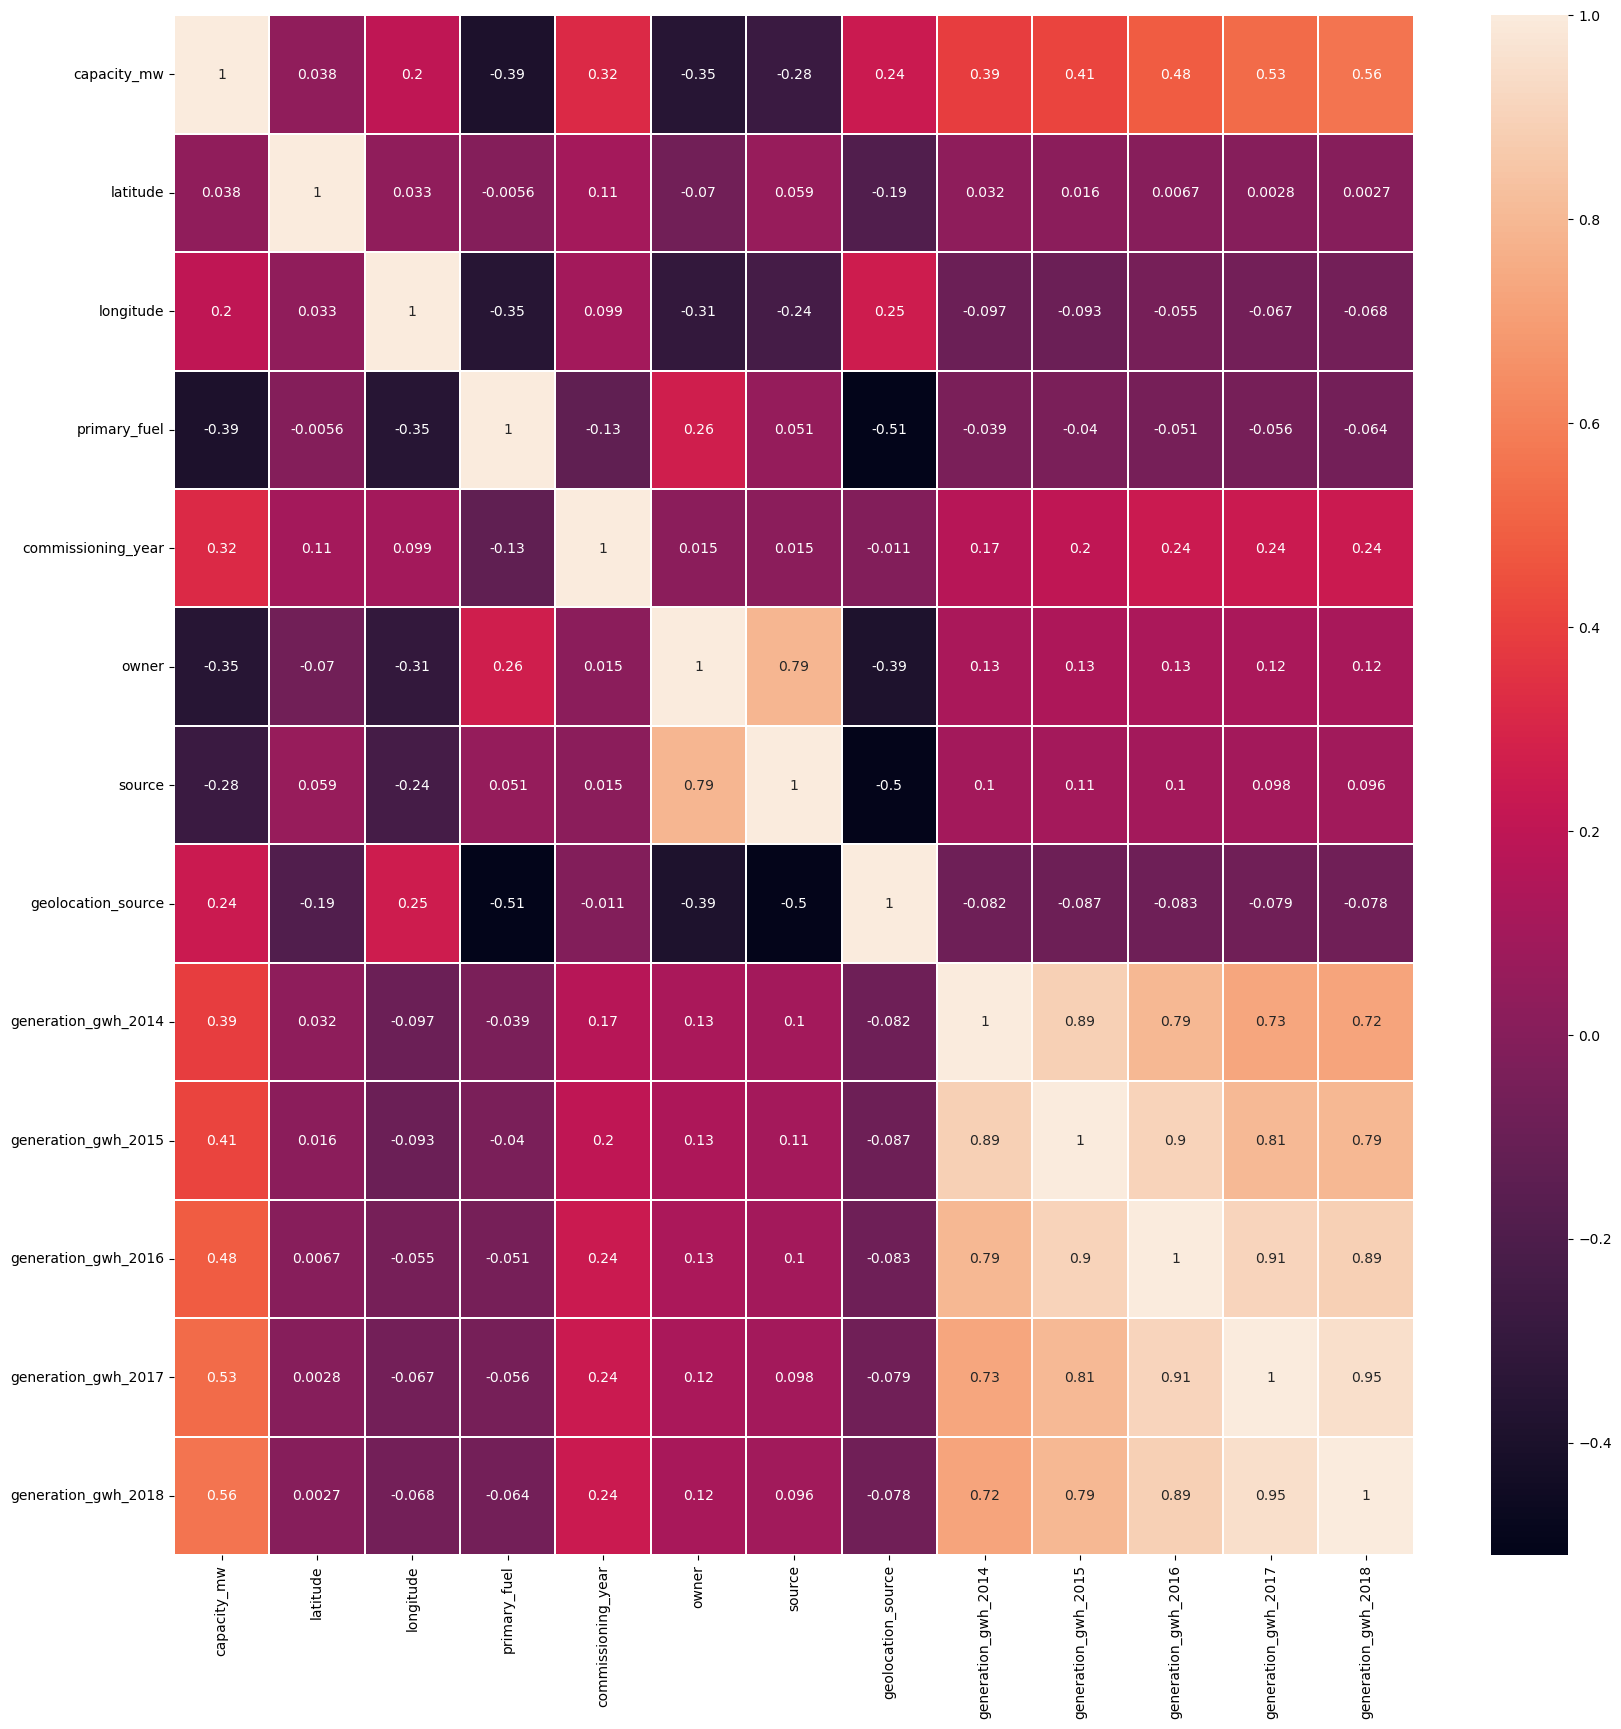

In [82]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,linewidths=0.2)

In [83]:
corr['capacity_mw'].sort_values(ascending=False)

capacity_mw            1.000000
generation_gwh_2018    0.562448
generation_gwh_2017    0.532635
generation_gwh_2016    0.483223
generation_gwh_2015    0.411172
generation_gwh_2014    0.389000
commissioning_year     0.320950
geolocation_source     0.239448
longitude              0.198594
latitude               0.038180
source                -0.278663
owner                 -0.352630
primary_fuel          -0.393918
Name: capacity_mw, dtype: float64

From above correlation values we observe that primary fuel is highly negatively correlated to capacity in mw  
while longitude is positively highly correlated to target

In [84]:
a=corr['primary_fuel'].sort_values(ascending=True)
a

geolocation_source    -0.510422
capacity_mw           -0.393918
longitude             -0.353844
commissioning_year    -0.133292
generation_gwh_2018   -0.063902
generation_gwh_2017   -0.055641
generation_gwh_2016   -0.050751
generation_gwh_2015   -0.039703
generation_gwh_2014   -0.039059
latitude              -0.005632
source                 0.051384
owner                  0.263289
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

From above values we observe that primary fuel is  highly negativley correlted to capacity and longitude and very less correlted to
other fuels and generation in 2015

SEPERATING FEATURES AND LEBELS

In [85]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

SCALING FEATURES

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.116938,-0.845595,1.241654,1.092768,2.064202,1.400245,-1.022609,0.200464,0.210753,0.202160,0.193053,0.190622
1,0.573076,-0.566972,-0.961786,0.007610,2.413707,2.824240,0.411082,0.200464,0.210753,0.202160,0.193053,0.190622
2,0.117549,-1.633125,1.682343,0.007610,-0.669432,-0.527626,0.411082,0.200464,0.210753,0.202160,0.193053,0.190622
3,0.430633,2.844033,-0.521098,0.549720,-0.631985,-0.505718,0.411082,-1.019012,-0.834253,-0.800328,-0.957155,-0.953188
4,0.126540,1.021343,-0.961786,1.403081,-0.631985,-0.505718,0.411082,0.575334,2.424218,2.500833,1.839699,2.790663
...,...,...,...,...,...,...,...,...,...,...,...,...
839,-0.775028,-0.007444,-0.961786,1.480659,-0.631985,-0.505718,0.411082,0.200464,-1.375606,-1.202364,-0.837727,-0.919276
840,-1.316361,0.157209,1.241654,0.007610,0.678661,0.699201,-2.456301,0.200464,0.210753,0.202160,0.193053,0.190622
841,-0.937204,-0.369026,1.682343,0.007610,-0.631985,-0.527626,0.411082,0.200464,0.210753,0.202160,0.193053,0.190622
842,0.506827,-0.742356,-0.961786,0.007610,0.404049,0.304864,0.411082,0.200464,0.210753,0.202160,0.193053,0.190622


In [87]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 844, dtype: float64

CHECKING VIF

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
viff=pd.DataFrame()
viff['columns']=x.columns
viff['values']=[vif(x.values,i) for i in range(len(x.columns))]

viff

,columns,values
0,latitude,1.097155
1,longitude,1.248457
2,primary_fuel,2.081056
3,commissioning_year,1.114149
4,owner,3.540937
5,source,4.231497
6,geolocation_source,2.255099
7,generation_gwh_2014,4.993456
8,generation_gwh_2015,10.125833
9,generation_gwh_2016,11.649893


In [89]:
#Dropping columns showing multicollinaerity  
#Gwh 2016 and gwh2018 showing highly collinearity with other columns
x.drop(['generation_gwh_2016','generation_gwh_2018'],axis=1,inplace=True)

CHECKING AGAIN FOR VIF VALUES

In [90]:
viff=pd.DataFrame()
viff['columns']=x.columns
viff['values']=[vif(x.values,i) for i in range(len(x.columns))]

viff

,columns,values
0,latitude,1.096903
1,longitude,1.239192
2,primary_fuel,2.074490
3,commissioning_year,1.110691
4,owner,3.539018
5,source,4.228293
6,geolocation_source,2.252586
7,generation_gwh_2014,4.893349
8,generation_gwh_2015,6.400599
9,generation_gwh_2017,2.926882


MACHINE LEARNING/MODEL BUILDING FOR TARGET VARIABLE CAPACITY_MW

In [247]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor




In [248]:
lr=LinearRegression()
ls=Lasso()
rd=Ridge()
enr=ElasticNet()
svr=SVR()
rfr=RandomForestRegressor()
etr=ExtraTreesRegressor()
knn=KNeighborsRegressor()
gbr=GradientBoostingRegressor()

models=[lr,ls,rd,enr,svr,rfr,etr,knn,gbr]

BUILDING TRAIN TEST SPLIT

In [249]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print('Max accuracy of',maxacc,'at random state',i)

Max accuracy of 0.6784081338480292 at random state 199


In [250]:
##TRAIN TEST SPLIT AND RANDOM STATE=199
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=199)

ACCUARCY SCORE FOR ALL MODELS

In [251]:
for m in models:
    print('For',m)
    m.fit(x_train,y_train)
    ypred=m.predict(x_test)
    acc=r2_score(y_test,ypred)
    print('Accuracy score',acc)
    
    print('Absolute error',mean_absolute_error(y_test,ypred))

    print('squared error',mean_squared_error(y_test,ypred))
    print('--'*60)

For LinearRegression()
Accuracy score 0.5864626570497964
Absolute error 217.92402360658053
squared error 92816.83730457468
------------------------------------------------------------------------------------------------------------------------
For Lasso()
Accuracy score 0.5851188682962143
Absolute error 217.9901452066364
squared error 93118.44542833722
------------------------------------------------------------------------------------------------------------------------
For Ridge()
Accuracy score 0.586434927057169
Absolute error 217.8214991450548
squared error 92823.06119283538
------------------------------------------------------------------------------------------------------------------------
For ElasticNet()
Accuracy score 0.5361944654601174
Absolute error 221.51971099399827
squared error 104099.3360677789
------------------------------------------------------------------------------------------------------------------------
For SVR()
Accuracy score -0.2303841293170943
Absolute e

CROSS VAL SCORE

In [99]:
for c in models:
    print("For",c)
    score=cross_val_score(c,x,y,cv=5)
    print(score.mean())
    print("-"*60)

For LinearRegression()
0.5198358826050365
------------------------------------------------------------
For Lasso()
0.5220490240375303
------------------------------------------------------------
For Ridge()
0.5202967612720067
------------------------------------------------------------
For ElasticNet()
0.5054920416578115
------------------------------------------------------------
For SVR()
-0.18683667100129053
------------------------------------------------------------
For RandomForestRegressor()
0.749112920825783
------------------------------------------------------------
For ExtraTreesRegressor()
0.770365824490852
------------------------------------------------------------
For KNeighborsRegressor()
0.6768914126108305
------------------------------------------------------------
For GradientBoostingRegressor()
0.7125066832163753
------------------------------------------------------------


FROM ABOVE WE CHOOSE EXTATREESREGRESSOR MODEL PROVIDING HIGHEST ACCURACY

HYPERPARAMETER TUNING

In [104]:
parameters={ 'n_estimators': [200,50,100],
    'criterion': ['squared_error','absolute_error'],
    'max_depth': [2,8,10],
    'n_jobs':[-2,-1]
    
   }
gcv=GridSearchCV(etr,parameters)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2}

BUILDING THE MODEL AGAIN

In [108]:
etrmodel=ExtraTreesRegressor(criterion= 'squared_error',
 max_depth= 10,
 n_estimators= 200,
 n_jobs=-2)
etrmodel.fit(x_train,y_train)
ypred=etrmodel.predict(x_test)
print(r2_score(y_test,ypred))
print(mean_absolute_error(y_test,ypred))                             

0.7667081257530882
120.30550268906626


EXTRATREES REGRESSOR PROVIDING BEST CCUARCY FOR PREDICTING CAPACITY OF POWER PLANT

SAVING MODEL

In [109]:
import joblib
joblib.dump(etrmodel,'PP capacity-mw.pkl')

['PP capacity-mw.pkl']

In [111]:
model=joblib.load('PP capacity-mw.pkl')
model

ExtraTreesRegressor(max_depth=10, n_estimators=200, n_jobs=-2)

In [112]:
##Making DF of actual values and predicted values
df2=pd.DataFrame()
df2['actual values']=np.array(y_test)
df2['predicted values']=model.predict(x_test)
df2

,actual values,predicted values
0,15.0,59.558445
1,5.0,9.258753
2,15.0,17.325091
3,16.0,30.407595
4,36.0,88.685679
...,...,...
249,655.0,241.257159
250,1600.0,524.501367
251,1200.0,1446.563309
252,48.0,92.124700


# PROBLEM STMNT2:PREDICING PRIMARY FUEL

In [205]:
x1=df.drop('primary_fuel',axis=1)
y1=df['primary_fuel']


In [206]:
x1.shape

(844, 12)

In [207]:
y1.value_counts()

1    236
3    233
6    123
7    108
2     68
0     50
5     17
4      9
Name: primary_fuel, dtype: int64

In [214]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)
x1

,capacity_mw,latitude,longitude,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.620062,1.116938,-0.845595,1.092768,2.064202,1.400245,-1.022609,0.200464,0.210753,0.202160,0.193053,0.190622
1,-0.412104,0.573076,-0.566972,0.007610,2.413707,2.824240,0.411082,0.200464,0.210753,0.202160,0.193053,0.190622
2,-0.540145,0.117549,-1.633125,0.007610,-0.669432,-0.527626,0.411082,0.200464,0.210753,0.202160,0.193053,0.190622
3,-0.331534,0.430633,2.844033,0.549720,-0.631985,-0.505718,0.411082,-1.019012,-0.834253,-0.800328,-0.957155,-0.953188
4,3.294115,0.126540,1.021343,1.403081,-0.631985,-0.505718,0.411082,0.575334,2.424218,2.500833,1.839699,2.790663
...,...,...,...,...,...,...,...,...,...,...,...,...
839,2.858602,-0.775028,-0.007444,1.480659,-0.631985,-0.505718,0.411082,0.200464,-1.375606,-1.202364,-0.837727,-0.919276
840,-0.618973,-1.316361,0.157209,0.007610,0.678661,0.699201,-2.456301,0.200464,0.210753,0.202160,0.193053,0.190622
841,-0.569978,-0.937204,-0.369026,0.007610,-0.631985,-0.527626,0.411082,0.200464,0.210753,0.202160,0.193053,0.190622
842,-0.451301,0.506827,-0.742356,0.007610,0.404049,0.304864,0.411082,0.200464,0.210753,0.202160,0.193053,0.190622


# CHECKING VIF AFCTOR

In [213]:
viff1=pd.DataFrame()
viff1['columns']=x1.columns
viff1['values']=[vif(x1.values,i) for i in range(len(x1.columns))]

viff1

,columns,values
0,capacity_mw,2.254398
1,latitude,1.096244
2,longitude,1.176345
3,commissioning_year,1.169104
4,owner,3.262750
5,source,3.107540
6,geolocation_source,1.480086
7,generation_gwh_2014,5.007135
8,generation_gwh_2015,10.153298
9,generation_gwh_2016,11.645238


In [215]:
x1.drop(['generation_gwh_2017','generation_gwh_2018'],axis=1,inplace=True)

In [216]:
x1.shape

(844, 10)

# FROM ABOVE WE OBSERVE THAT TARGET VARIABLE HAS 8 UNIQUE VALUES,WHICH WERE CATEGORICAL (ARE ENCODED).
HENCE,PROBLEM IS SOLVED AS CLASSIFICATION PROBLEM

In [217]:
##Also,we observe that imbalance in the target variable ##Applying sampling techniques to balance target variable
!pip install imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x11,y11=smote.fit_resample(x1,y1)

In [218]:
y11.value_counts()

6    236
1    236
7    236
2    236
3    236
0    236
5    236
4    236
Name: primary_fuel, dtype: int64

In [219]:
x1,y1=x11,y11

In [220]:
y1.shape

(1888,)

MACHINE LEARNING/MODEL BUILDING FOR TARGET VARIABLE CAPACITY_MW

In [223]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier




In [224]:
lr=LogisticRegression()

svc=SVC()
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
knc=KNeighborsClassifier()
gbc=GradientBoostingClassifier()

models=[lr,svc,rfc,etc,knc,gbc]

BUILDING TRAIN TEST SPLIT

In [228]:
maxacc=0
maxrs=0
for i in range(200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    lr.fit(x1_train,y1_train)
    ypred1=lr.predict(x1_test)
    acc=accuracy_score(y1_test,ypred1)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print('Max accuracy of',maxacc,'at random state',i)

Max accuracy of 0.7654320987654321 at random state 199


In [229]:
##TRAIN TEST SPLIT AND RANDOM STATE=199
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=199)

ACCUARCY SCORE FOR ALL MODELS

In [234]:
for m in models:
    print('For',m)
    m.fit(x1_train,y1_train)
    ypred1=m.predict(x1_test)
    acc=accuracy_score(y1_test,ypred1)
    print('Accuracy score',acc)
    
    print('confusion_matrix',confusion_matrix(y1_test,ypred1))

    print('classification_report',classification_report(y1_test,ypred1))
    print('--'*60)

For LogisticRegression()
Accuracy score 0.7125220458553791
confusion_matrix [[61  0  0  0  0  2  0 15]
 [ 7 33 14  2  9  2  0  4]
 [ 9  5 35  6  3 11  0  2]
 [ 1  8 17 32  3  8  0  3]
 [ 0  0  0 12 67  0  0  0]
 [ 7  2  1  2  0 48  0  2]
 [ 0  0  0  0  0  0 64  0]
 [ 3  0  0  3  0  0  0 64]]
classification_report               precision    recall  f1-score   support

           0       0.69      0.78      0.73        78
           1       0.69      0.46      0.55        71
           2       0.52      0.49      0.51        71
           3       0.56      0.44      0.50        72
           4       0.82      0.85      0.83        79
           5       0.68      0.77      0.72        62
           6       1.00      1.00      1.00        64
           7       0.71      0.91      0.80        70

    accuracy                           0.71       567
   macro avg       0.71      0.72      0.71       567
weighted avg       0.71      0.71      0.70       567

----------------------------------

From above ,we observe that Extra trees classifier providing highest accuracy score

CROSS VAL SCORE

In [238]:
for cc in models:
    print("For",cc)
    score=cross_val_score(cc,x1,y1,cv=5)
    print(score.mean())
    print("-"*60)

For LogisticRegression()
0.720334582403548
------------------------------------------------------------
For SVC()
0.8114507459335046
------------------------------------------------------------
For RandomForestClassifier()
0.9232046369977404
------------------------------------------------------------
For ExtraTreesClassifier()
0.9337950682778269
------------------------------------------------------------
For KNeighborsClassifier()
0.866523514799377
------------------------------------------------------------
For GradientBoostingClassifier()
0.9173690932311622
------------------------------------------------------------


FROM ABOVE WE CHOOSE EXTATREESREGRESSOR MODEL PROVIDING HIGHEST ACCURACY

HYPERPARAMETER TUNING

In [240]:
parameters={ 'n_estimators': [200,50,100],
    'criterion': ['gini','entropy'],
    'max_depth': [2,8,10],
    'n_jobs':[-2,-1]
    
   }
gcv=GridSearchCV(etc,parameters)
gcv.fit(x1_train,y1_train)
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200, 'n_jobs': -1}

BUILDING THE MODEL AGAIN

In [243]:
etrmodel1=ExtraTreesClassifier(criterion= 'entropy',
 max_depth= 10,
 n_estimators= 200,
 n_jobs=-1)
etrmodel1.fit(x1_train,y1_train)
ypred1=etrmodel1.predict(x1_test)
print(accuracy_score(y1_test,ypred1))
print(classification_report(y1_test,ypred1))                             

0.8765432098765432
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        78
           1       0.92      0.63      0.75        71
           2       0.73      0.72      0.72        71
           3       0.98      0.79      0.88        72
           4       0.91      1.00      0.95        79
           5       0.86      0.95      0.90        62
           6       1.00      1.00      1.00        64
           7       0.81      1.00      0.90        70

    accuracy                           0.88       567
   macro avg       0.88      0.88      0.87       567
weighted avg       0.88      0.88      0.87       567



EXTRATREES CLASSIFIER PROVIDING BEST CCUARCY FOR PREDICTING CAPACITY OF POWER PLANT

SAVING MODEL

In [244]:
import joblib
joblib.dump(etrmodel1,'PP primary fuel.pkl')

['PP primary fuel.pkl']

In [245]:
model=joblib.load('PP primary fuel.pkl')
model

ExtraTreesClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                     n_jobs=-1)

In [246]:
##Making DF of actual values and predicted values
df3=pd.DataFrame()
df3['actual values']=np.array(y1_test)
df3['predicted values']=model.predict(x1_test)
df3

,actual values,predicted values
0,0,0
1,2,0
2,1,1
3,0,0
4,3,3
...,...,...
562,4,4
563,7,7
564,7,7
565,7,7
